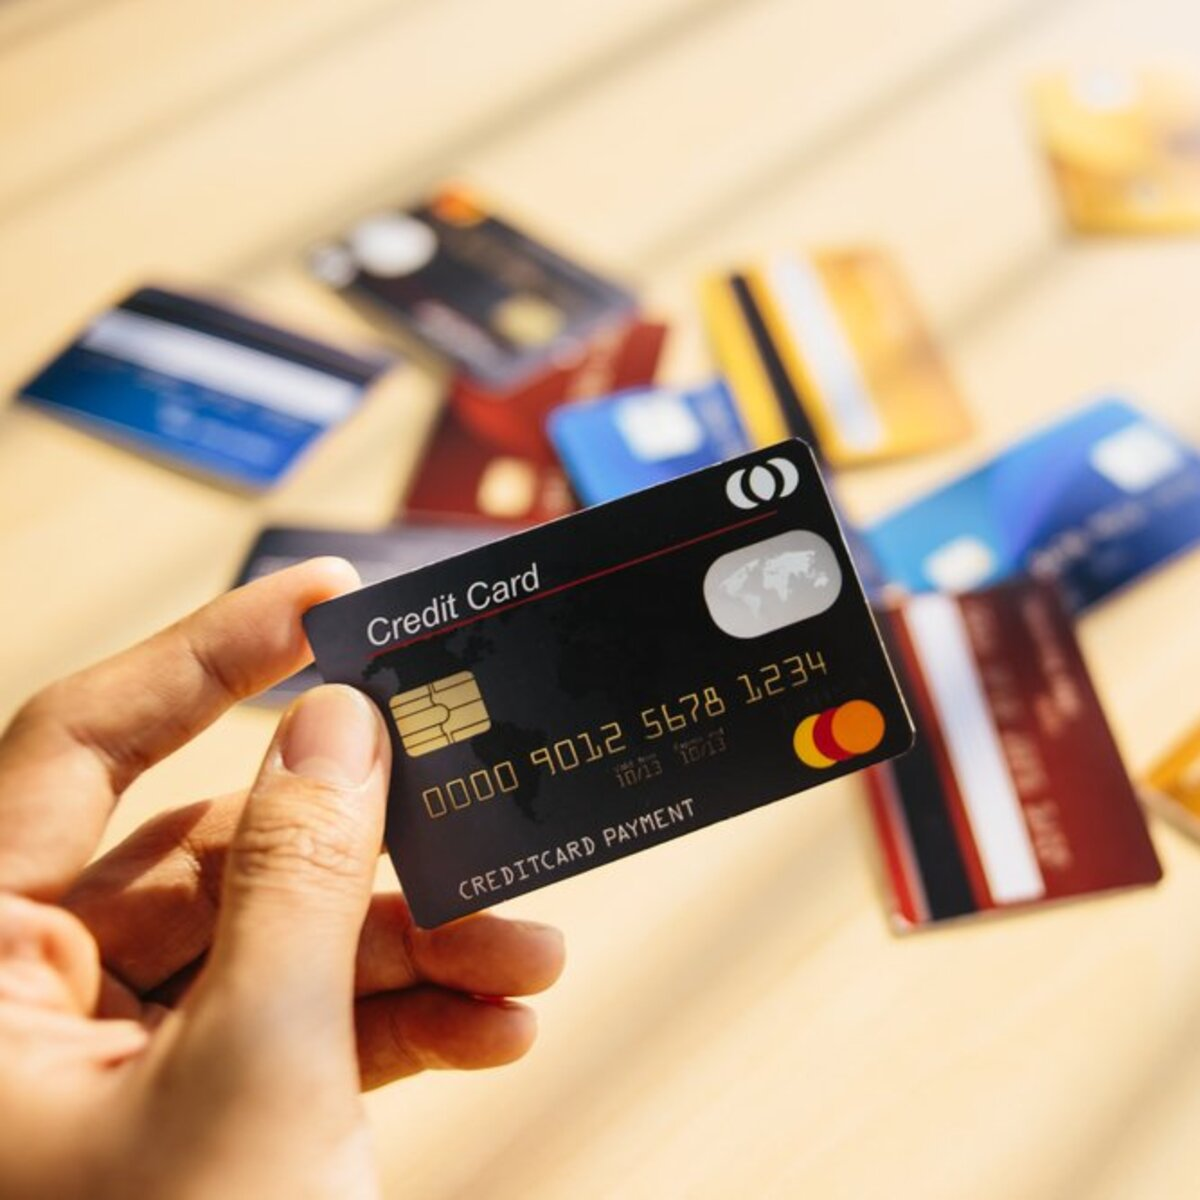

**PROJECT 1**

---



---



---



**# This code imports four essential libraries for data analysis and visualization in Python.**
 - Pandas (pd) is used for data manipulation and analysis.
 - NumPy (np) supports large multi-dimensional arrays and mathematical operations.
 - Seaborn (sns) and Matplotlib (plt) are used for creating attractive and informative visualizations.

---







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**# Reading individual sheets from the dataset:**
- Customer Acquisition: Contains customer details such as age, city, and segment.
- Spend: Records amounts spent by customers along with timestamps.
- Repayment: Logs amounts repaid by customers to their credit cards, also with timestamps.

---



In [2]:
df_customer = pd.read_excel('Credit Banking_Project - 1.xls', sheet_name='Customer Acqusition')
df_spend = pd.read_excel('Credit Banking_Project - 1.xls', sheet_name='Spend')
df_repayment = pd.read_excel('Credit Banking_Project - 1.xls', sheet_name='Repayment')

**# This integration enhances analysis by merging df_customer details into df_spend and df_repayment.**

---


 It enables leveraging comprehensive customer data to extract
deeper insights and generate comprehensive reports on financial transactions, enhancing decision-making capabilities in business analysis.

---



In [3]:
# Merge customer details with spend data
df_spend_combined = pd.merge(df_spend, df_customer, on='Customer', how='left')

# Merge customer details with repayment data
df_repayment_combined = pd.merge(df_repayment, df_customer, on='Customer', how='left')


**# Overview of the df_spend_combined**

---



In [4]:
df_spend_combined.head()

,Sl No:_x,Customer,Month,Type,Amount,Sl No:_y,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,473775.834869,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A1,2004-01-03,PETRO,335578.666019,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,371040.941912,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
3,4,A1,2004-01-25,FOOD,141177.813256,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,398403.771812,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed


**# Overview of the df_repayment_combined**

---



In [5]:
df_repayment_combined.head()

,SL No:,Customer,Month,Amount,Sl No:,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,2004-01-12,331844.007374,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A1,2004-01-03,441139.807335,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
2,3,A1,2004-01-15,32480.004009,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
3,4,A1,2004-01-25,90636.966534,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
4,5,A1,2005-01-17,1581.969829,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed


**# This code checks for null values in datasets, crucial for ensuring accurate data analysis and consistent output reliability.**

---



In [6]:
# Checking null values
print(df_spend_combined.isnull().sum())
print(df_repayment_combined.isnull().sum())

Sl No:_x               0
Customer               0
Month                  0
Type                   0
Amount                 0
Sl No:_y               0
Age                    0
City                   0
Credit Card Product    0
Limit                  0
Company                0
Segment                0
dtype: int64
SL No:                 0
Customer               0
Month                  0
Amount                 0
Sl No:                 0
Age                    0
City                   0
Credit Card Product    0
Limit                  0
Company                0
Segment                0
dtype: int64


**# These lines replace null values in the 'Age' column of df_spend_combined with the mean of non-null values from that column. Subsequently, checking for null values confirms the completion of this data preprocessing step, ensuring data integrity for further analysis.**

---



In [7]:
# Replace null values with the mean of their respective columns and assign back to the DataFrame
df_spend_combined['Age'] = df_spend_combined['Age'].fillna(df_spend_combined['Age'].mean())

# Now check for null values
df_spend_combined.isnull().sum()

Sl No:_x               0
Customer               0
Month                  0
Type                   0
Amount                 0
Sl No:_y               0
Age                    0
City                   0
Credit Card Product    0
Limit                  0
Company                0
Segment                0
dtype: int64


 **# Identify customers in df_spend_combined who exceeded their spending limit (over_limit_mask). Random amounts below their respective limits are generated for these customers (random_amounts). Updating the 'Amount' column with these new values ensures compliance with set limits, as shown in the printed DataFrame preview.**

---



In [8]:
# Highlight the customers who had spent more than their limit
over_limit_mask = df_spend_combined['Amount'] > df_spend_combined['Limit']

# Generate random amounts less than their limit for these rows
random_amounts = np.random.uniform(0, df_spend_combined.loc[over_limit_mask, 'Limit'])

# Update the Amount column with the new random values
df_spend_combined.loc[over_limit_mask, 'Amount'] = random_amounts

print(df_spend_combined.head())

   Sl No:_x Customer      Month       Type         Amount  Sl No:_y       Age  \
0         1       A1 2004-01-12  JEWELLERY  473775.834869         1  0.928521   
1         2       A1 2004-01-03      PETRO  335578.666019         1  0.928521   
2         3       A1 2004-01-15    CLOTHES  371040.941912         1  0.928521   
3         4       A1 2004-01-25       FOOD  141177.813256         1  0.928521   
4         5       A1 2005-01-17     CAMERA  398403.771812         1  0.928521   

        City Credit Card Product   Limit Company        Segment  
0  BANGALORE                Gold  500000      C1  Self Employed  
1  BANGALORE                Gold  500000      C1  Self Employed  
2  BANGALORE                Gold  500000      C1  Self Employed  
3  BANGALORE                Gold  500000      C1  Self Employed  
4  BANGALORE                Gold  500000      C1  Self Employed  





**# Extract the month from the 'spend_date' column in df_spend_combined, assigning the result to a new 'Month_N' column represented as periods ('M').**

---



In [9]:
# Extract month from the spend_date
df_spend_combined['Month_N'] = df_spend_combined['Month'].dt.to_period('M')
df_spend_combined.head()


,Sl No:_x,Customer,Month,Type,Amount,Sl No:_y,Age,City,Credit Card Product,Limit,Company,Segment,Month_N
0,1,A1,2004-01-12,JEWELLERY,473775.834869,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
1,2,A1,2004-01-03,PETRO,335578.666019,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
2,3,A1,2004-01-15,CLOTHES,371040.941912,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
3,4,A1,2004-01-25,FOOD,141177.813256,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
4,5,A1,2005-01-17,CAMERA,398403.771812,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2005-01


**TASK 1**

---



**# Calculate the monthly spending of each customer by grouping df_spend_combined by 'Customer' and 'Month_N', summing the 'Amount' for each group, and resetting the index. The resulting DataFrame monthly_spend shows the aggregated monthly spending data.**

---



In [10]:
# Monthly spend of each customer
monthly_spend = df_spend_combined.groupby(['Customer', 'Month_N'])['Amount'].sum().reset_index()
monthly_spend.head()

,Customer,Month_N,Amount
0,A1,2004-01,1.511173e+06
1,A1,2004-02,4.138111e+04
2,A1,2004-05,1.311966e+05
3,A1,2005-01,3.984038e+05
4,A1,2005-02,1.404193e+06


**HEATMAP FOR MONTHLY SPEND PER CUSTOMER**

---



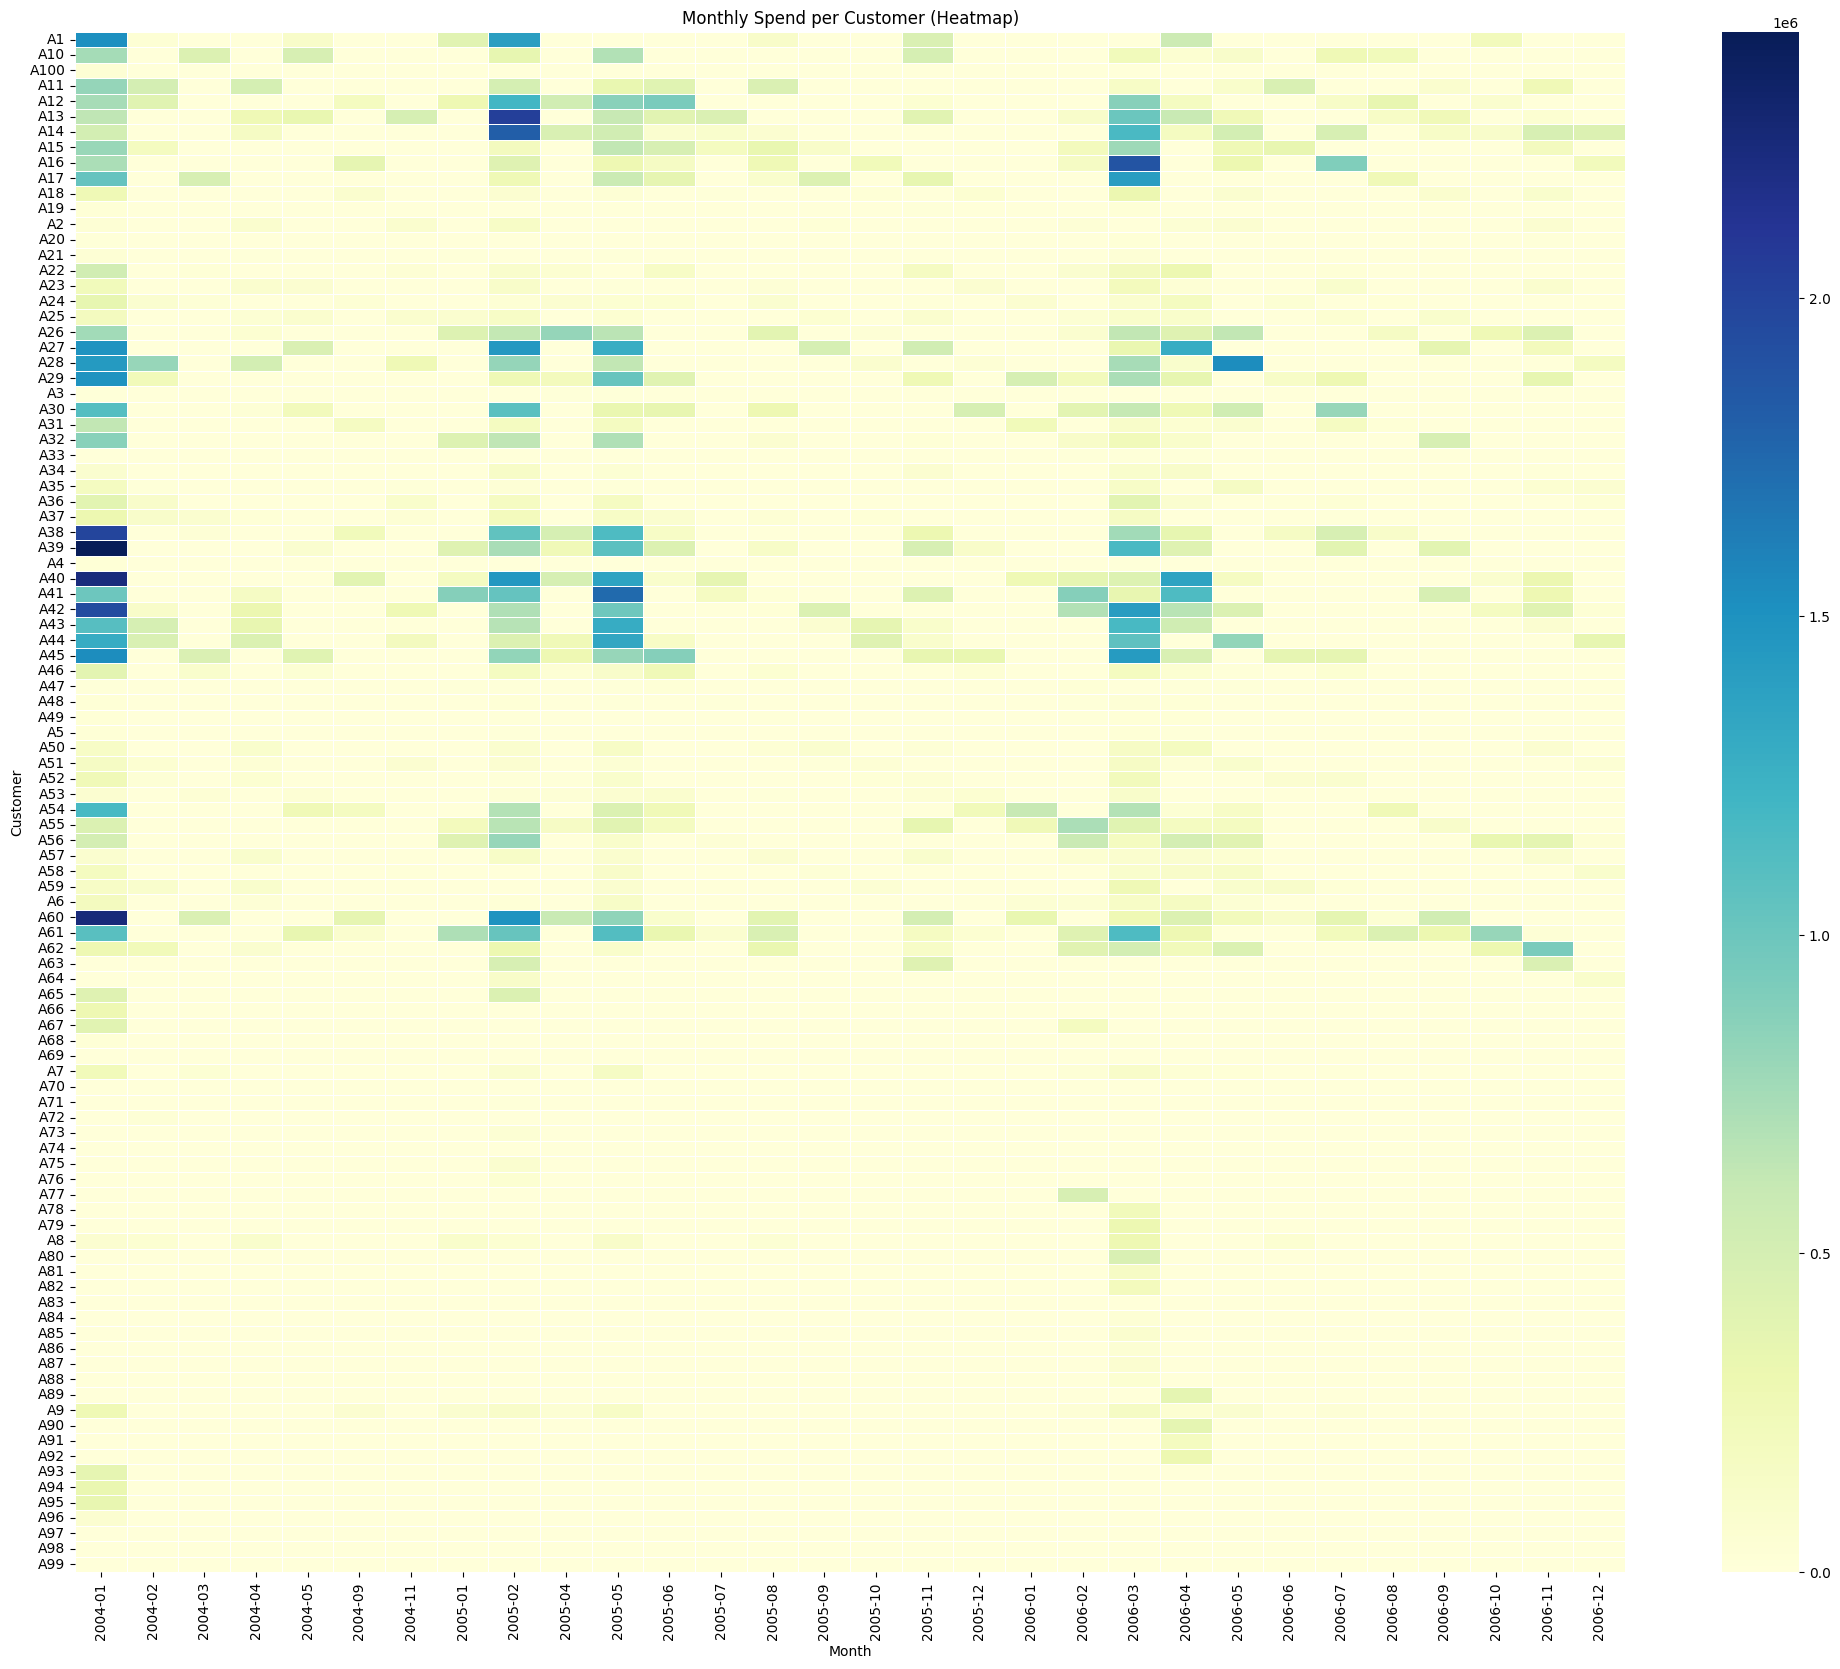

In [11]:
# Pivot the data for the heatmap
monthly_spend_pivot = monthly_spend.pivot(index='Customer', columns='Month_N', values='Amount').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(monthly_spend_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('Monthly Spend per Customer (Heatmap)')
plt.show()

**# Extracting the month from the 'repayment_date' column in df_repayment_combined, storing the result in a new 'Month_N' column represented as periods ('M').**

---



In [12]:
# Extract month from the repayment_date
df_repayment_combined['Month_N'] = df_repayment_combined['Month'].dt.to_period('M')
df_repayment_combined.head()

,SL No:,Customer,Month,Amount,Sl No:,Age,City,Credit Card Product,Limit,Company,Segment,Month_N
0,1,A1,2004-01-12,331844.007374,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
1,2,A1,2004-01-03,441139.807335,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
2,3,A1,2004-01-15,32480.004009,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
3,4,A1,2004-01-25,90636.966534,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2004-01
4,5,A1,2005-01-17,1581.969829,1,0.928521,BANGALORE,Gold,500000,C1,Self Employed,2005-01


**TASK 2**

---



**# Calculate the monthly repayment
amount for each customer by grouping df_repayment_combined by 'Customer' and 'Month_N', summing the 'Amount' for each group, and resetting the index.**

---



In [13]:
# Monthly repayment of each customer
monthly_repayment = df_repayment_combined.groupby(['Customer', 'Month_N'])['Amount'].sum().reset_index()

monthly_repayment.head()

,Customer,Month_N,Amount
0,A1,2004-01,1.362775e+06
1,A1,2004-02,1.911800e+05
2,A1,2005-01,1.581970e+03
3,A1,2005-02,1.199808e+06
4,A1,2005-07,3.005817e+05


**HEATMAP FOR MONTHLY REPAYMENT FOR EACH CUSTOMER**

---





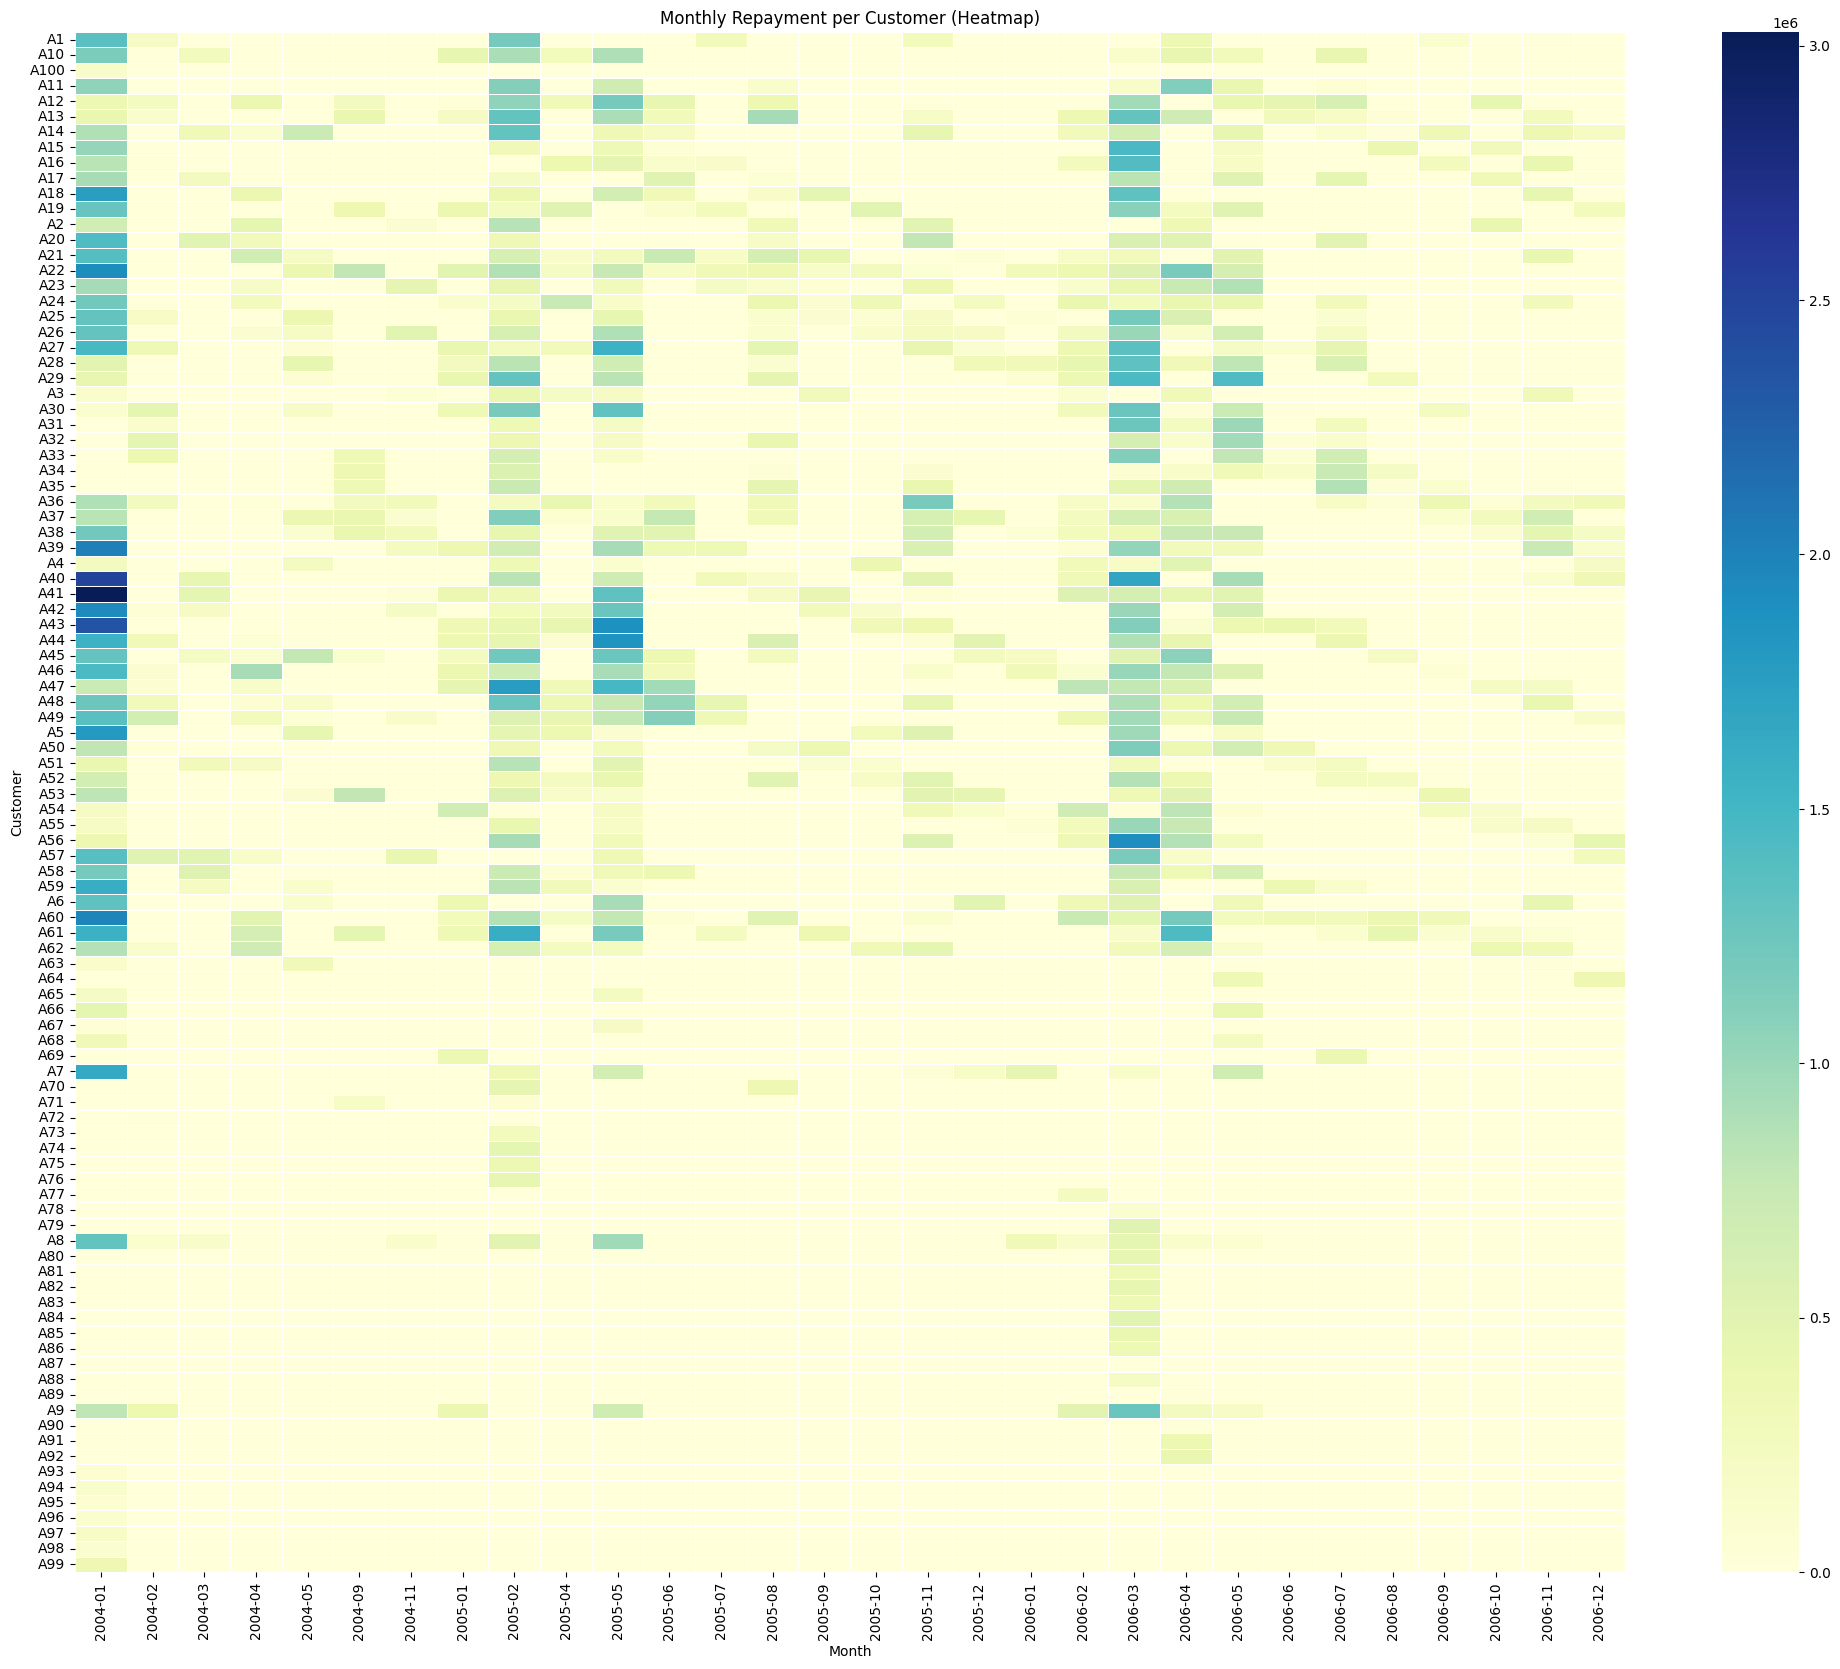

In [14]:
# Pivot the data for the heatmap
monthly_repayment_pivot = monthly_repayment.pivot(index='Customer', columns='Month_N', values='Amount').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(monthly_repayment_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('Monthly Repayment per Customer (Heatmap)')
plt.show()

**# First sorting monthly_repayment by 'Month_N' and 'Amount' in descending order to prioritize highest repayments. Then, they extract the top 10 customers with the highest repayment amounts for each month, resulting in top_10_repaying_customers_per_month.**

---



In [15]:
# Highest paying 10 customers

# Sort by repayment_amount within each month group
monthly_repayment_sorted = monthly_repayment.sort_values(by=['Month_N', 'Amount'], ascending=[True, False])

# Get top 10 customers with highest repayment amount for each month
top_10_repaying_customers_per_month = monthly_repayment_sorted.groupby('Month_N').head(10)

# Print or display the top 10 customers with highest repayment amount for each month
print(top_10_repaying_customers_per_month)




    Customer  Month_N        Amount
432      A41  2004-01  3.026776e+06
419      A40  2004-01  2.496299e+06
456      A43  2004-01  2.362765e+06
396      A39  2004-01  2.020853e+06
677      A60  2004-01  1.985479e+06
..       ...      ...           ...
646      A57  2006-12  2.822631e+05
74       A14  2006-12  2.180890e+05
395      A38  2006-12  2.012244e+05
418       A4  2006-12  1.965638e+05
552      A49  2006-12  1.543904e+05

[300 rows x 3 columns]


**HEATMAP FOR TOP 10 REPAYING CUSTOMERS PER MONTH**

---



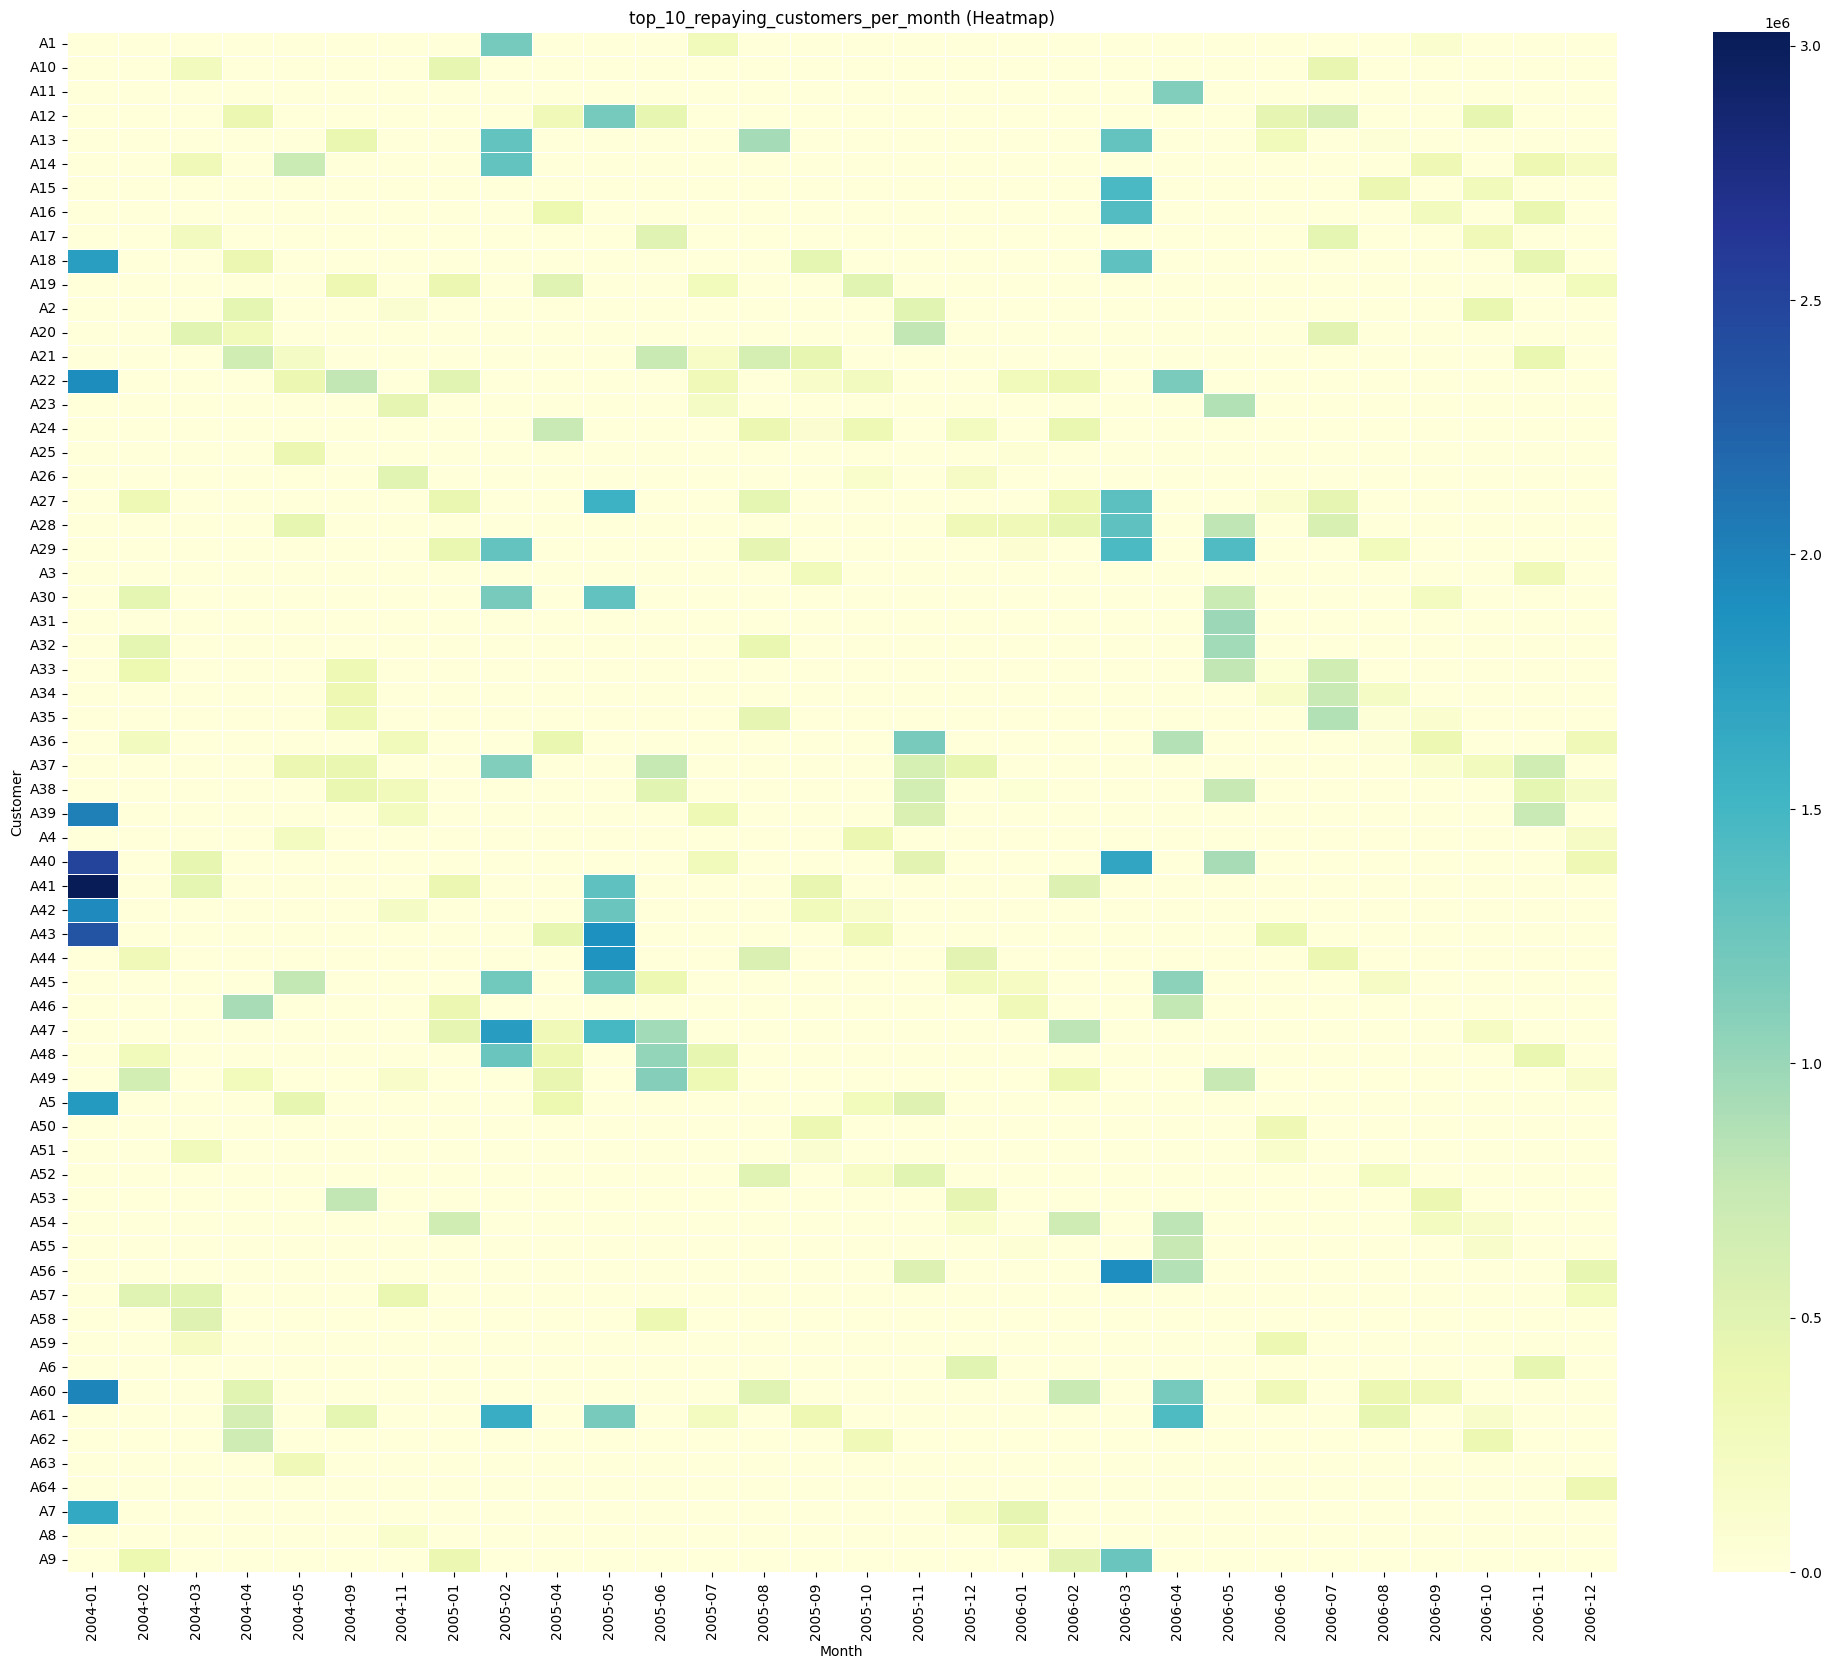

In [16]:
# Pivot the data for the heatmap
top_10_repaying_customers_per_month_pivot = top_10_repaying_customers_per_month.pivot(index='Customer', columns='Month_N', values='Amount').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(top_10_repaying_customers_per_month_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('top_10_repaying_customers_per_month (Heatmap)')
plt.show()

**# First sort segment_spend by 'Month_N' and 'Amount' in descending order to prioritize the segment with the highest spending. Then, they extract the top segment with the highest spending amount for each month, resulting in top_1_segment_spend_per_month.**

---



In [19]:
# Segment which is spending more money

# Calculate the total spend for each segment per month
segment_spend = df_spend_combined.groupby(['Segment', 'Month_N'])['Amount'].sum().reset_index()

# Sort by segment_spend within each month group
segment_spend_sorted = segment_spend.sort_values(by=['Month_N', 'Amount'], ascending=[True, False])

# Get 1 segment with highest repayment amount for each month
top_segment_spend_per_month = segment_spend_sorted.groupby('Month_N').head(1)

# Print or display the top_1_segment_spend_per_month amount for each month
print(top_segment_spend_per_month)

           Segment  Month_N        Amount
30   Normal Salary  2004-01  9.971546e+06
61    Salaried_MNC  2004-02  1.277256e+06
90    Salaried_Pvt  2004-03  9.524219e+05
63    Salaried_MNC  2004-04  1.418108e+06
34   Normal Salary  2004-05  7.767410e+05
93    Salaried_Pvt  2004-09  7.949295e+05
66    Salaried_MNC  2004-11  1.054686e+06
7             Govt  2005-01  1.758316e+06
125  Self Employed  2005-02  7.533471e+06
96    Salaried_Pvt  2005-04  2.132217e+06
127  Self Employed  2005-05  6.007062e+06
98    Salaried_Pvt  2005-06  1.641806e+06
72    Salaried_MNC  2005-07  4.791054e+05
43   Normal Salary  2005-08  1.573718e+06
131  Self Employed  2005-09  9.886581e+05
75    Salaried_MNC  2005-10  5.337920e+05
133  Self Employed  2005-11  2.425504e+06
17            Govt  2005-12  5.977486e+05
105   Salaried_Pvt  2006-01  1.181156e+06
49   Normal Salary  2006-02  2.918428e+06
50   Normal Salary  2006-03  7.664227e+06
137  Self Employed  2006-04  3.526440e+06
52   Normal Salary  2006-05  3.177

**HEATMAP FOR TOP SEGMENT SPEND PER MONTH**

---



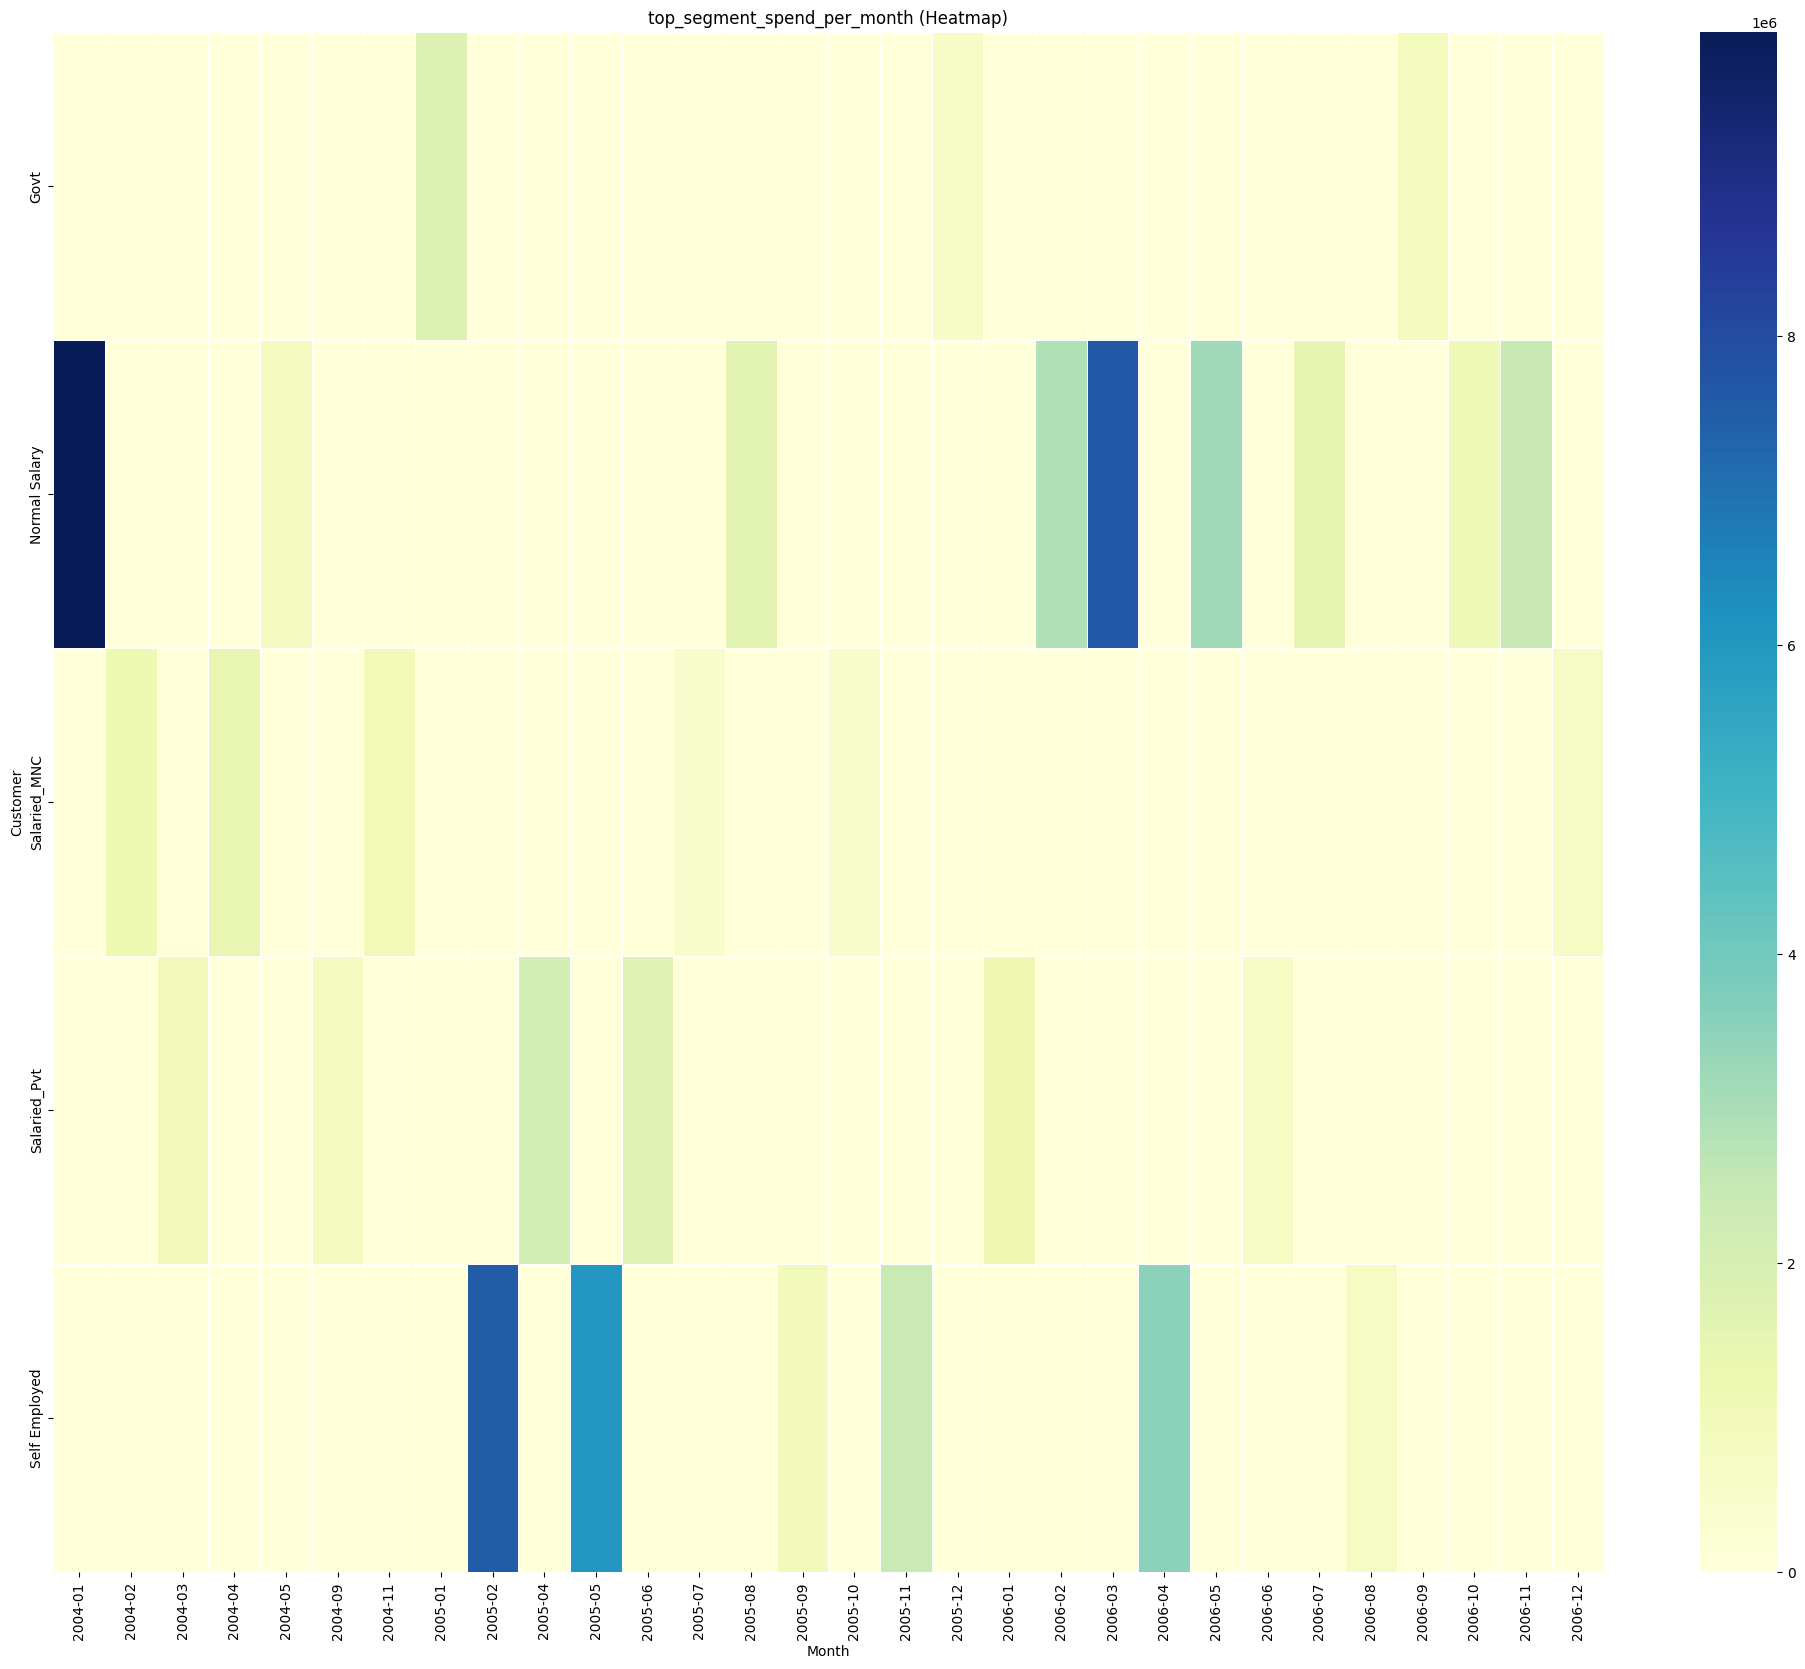

In [20]:
# Pivot the data for the heatmap
top_segment_spend_per_month_pivot = top_segment_spend_per_month.pivot(index='Segment', columns='Month_N', values='Amount').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(top_segment_spend_per_month_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('top_segment_spend_per_month (Heatmap)')
plt.show()

**# First converting the 'Age' column in df_spend_combined to numeric, handling any non-numeric values by coercing them (errors='coerce'). Then, they define age groups and assign each row in 'Age' to an appropriate group. Next, the script groups data by 'Month_N' and 'age_group', computes total spending, and identifies the age group with the highest spending for each month in highest_spending_by_month**

---



In [21]:
# Convert the 'Age' column to numeric, handling non-numeric values
df_spend_combined['Age'] = pd.to_numeric(df_spend_combined['Age'], errors='coerce')

# Define age groups
bins = [18, 30, 50, float('inf')]
labels = ['Young', 'Middle Age', 'Old Age']

# Add a column for age group
df_spend_combined['age_group'] = pd.cut(df_spend_combined['Age'], bins=bins, labels=labels, right=False)

# Group by month and age group, then calculate total spending
grouped = df_spend_combined.groupby(['Month_N', 'age_group'])['Amount'].sum().reset_index()

# Find the highest spending age group for each month
highest_spending_by_month = grouped.loc[grouped.groupby('Month_N')['Amount'].idxmax()]

print(highest_spending_by_month)



    Month_N   age_group        Amount
2   2004-01     Old Age  2.057487e+07
5   2004-02     Old Age  2.396496e+06
8   2004-03     Old Age  1.603655e+06
11  2004-04     Old Age  2.188012e+06
14  2004-05     Old Age  1.249070e+06
17  2004-09     Old Age  1.379053e+06
20  2004-11     Old Age  6.709362e+05
23  2005-01     Old Age  1.628258e+06
26  2005-02     Old Age  1.246670e+07
29  2005-04     Old Age  2.240900e+06
32  2005-05     Old Age  1.198274e+07
35  2005-06     Old Age  2.745682e+06
38  2005-07     Old Age  5.897251e+05
41  2005-08     Old Age  1.646078e+06
44  2005-09     Old Age  1.034497e+06
47  2005-10     Old Age  5.682761e+05
50  2005-11     Old Age  2.871865e+06
53  2005-12     Old Age  7.333040e+05
56  2006-01     Old Age  1.534494e+06
59  2006-02     Old Age  2.368397e+06
62  2006-03     Old Age  1.129458e+07
65  2006-04     Old Age  7.114946e+06
68  2006-05     Old Age  4.335661e+06
71  2006-06     Old Age  1.299405e+06
74  2006-07     Old Age  1.695927e+06
77  2006-08 

**HEATMAP FOR HIGHEST SPENDING AGE GROUP**

---



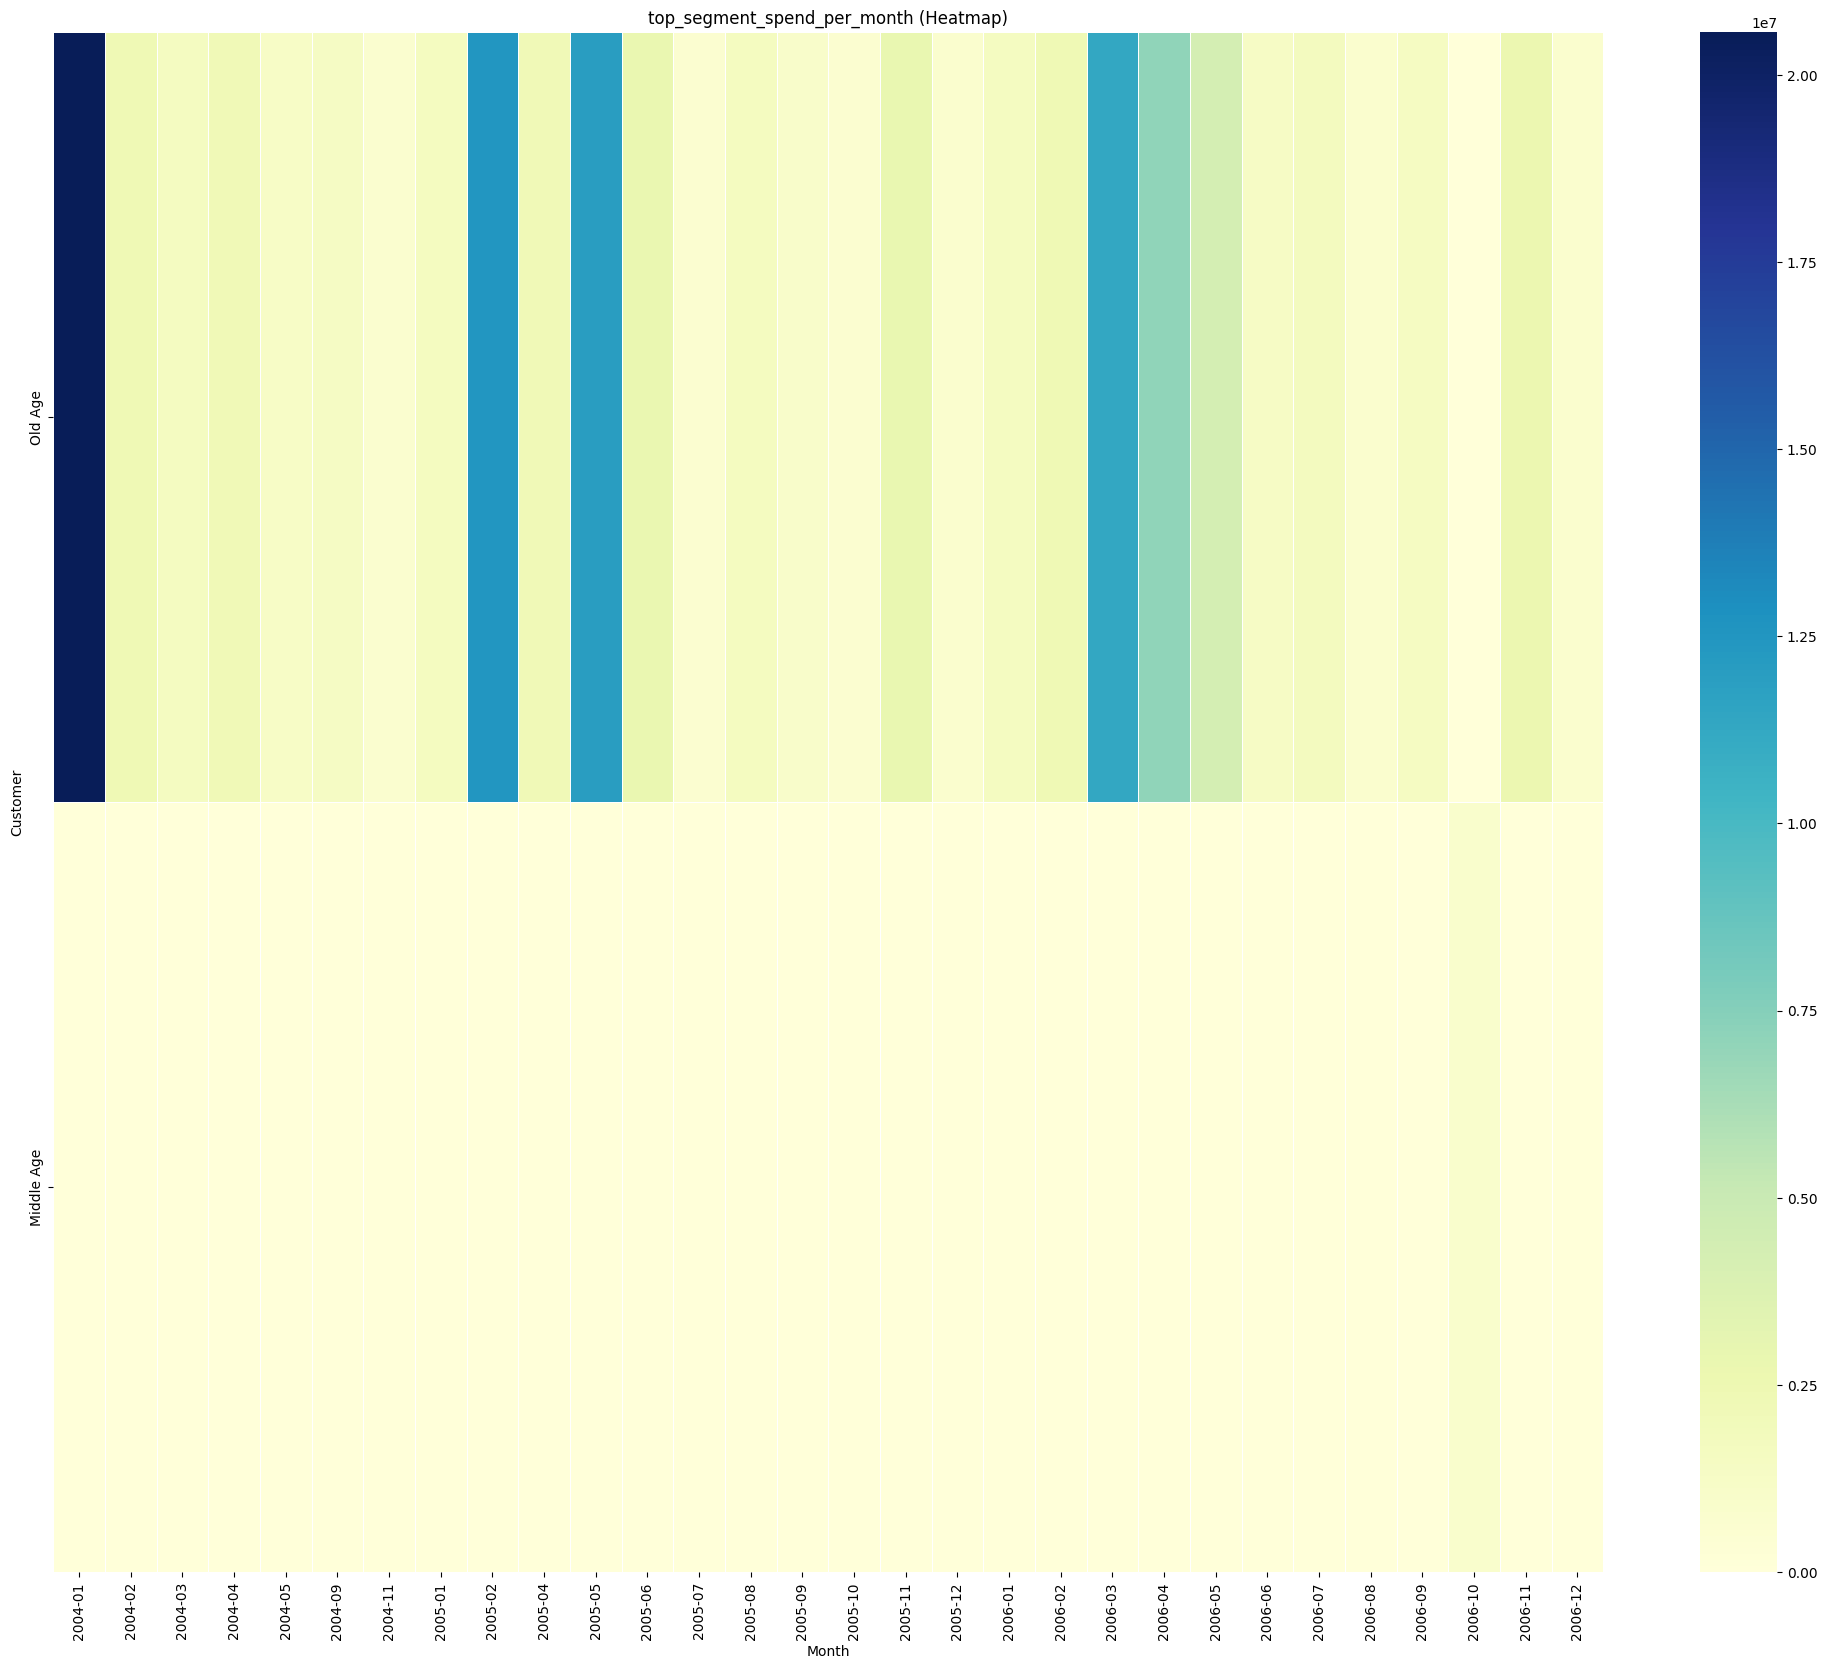

In [22]:
# Pivot the data for the heatmap
highest_spending_by_month_pivot = highest_spending_by_month.pivot(index='age_group', columns='Month_N', values='Amount').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(highest_spending_by_month_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('top_segment_spend_per_month (Heatmap)')
plt.show()

**This Python code calculates monthly spending and repayment totals by segment, computes the difference, applies a 2.9% interest rate on positive differences, and identifies the segment generating the highest monthly interest for the bank. It provides insights into profitability based on spending and repayment behaviors across different segments.**

---






In [23]:
# Group by Segment and Month_N for spending and repayment
spend_by_segment = df_spend_combined.groupby(['Segment', 'Month_N'])['Amount'].sum().reset_index()
repayment_by_segment = df_repayment_combined.groupby(['Segment', 'Month_N'])['Amount'].sum().reset_index()

# Merge the spend and repayment DataFrames on Segment and Month_N
combined_df = pd.merge(spend_by_segment, repayment_by_segment, on=['Segment', 'Month_N'], suffixes=('_spend', '_repayment'))

# Calculate the difference between spend and repayment
combined_df['Difference'] = combined_df['Amount_spend'] - combined_df['Amount_repayment']

# Impose an interest rate of 2.9% on the remaining amount if the difference is positive
combined_df['Interest'] = combined_df.apply(lambda x: x['Difference'] * 0.029 if x['Difference'] > 0 else 0, axis=1)

# Find the segment which pays the highest interest on a monthly basis
max_interest_segment = combined_df.groupby(['Segment', 'Month_N'])['Interest'].sum().reset_index()
max_interest_segment = max_interest_segment.loc[max_interest_segment.groupby('Month_N')['Interest'].idxmax()]

print(max_interest_segment)

           Segment  Month_N      Interest
0             Govt  2004-01      0.000000
85    Salaried_Pvt  2004-02   6852.150256
114  Self Employed  2004-03   8094.753550
61    Salaried_MNC  2004-04    949.024707
4             Govt  2004-05      0.000000
5             Govt  2004-09      0.000000
6             Govt  2004-11   4180.985256
7             Govt  2005-01      0.000000
8             Govt  2005-02      0.000000
92    Salaried_Pvt  2005-04  13999.406329
10            Govt  2005-05      0.000000
11            Govt  2005-06  30295.967079
12            Govt  2005-07   6685.644721
13            Govt  2005-08   7095.653902
126  Self Employed  2005-09  23986.852117
15            Govt  2005-10      0.000000
128  Self Employed  2005-11   5100.870394
46   Normal Salary  2005-12      0.000000
47   Normal Salary  2006-01  29593.249059
18            Govt  2006-02   8102.960716
19            Govt  2006-03      0.000000
132  Self Employed  2006-04  17850.059714
21            Govt  2006-05      0

**HEATMAP FOR MAX_INTEREST_SEGMNENT**

---



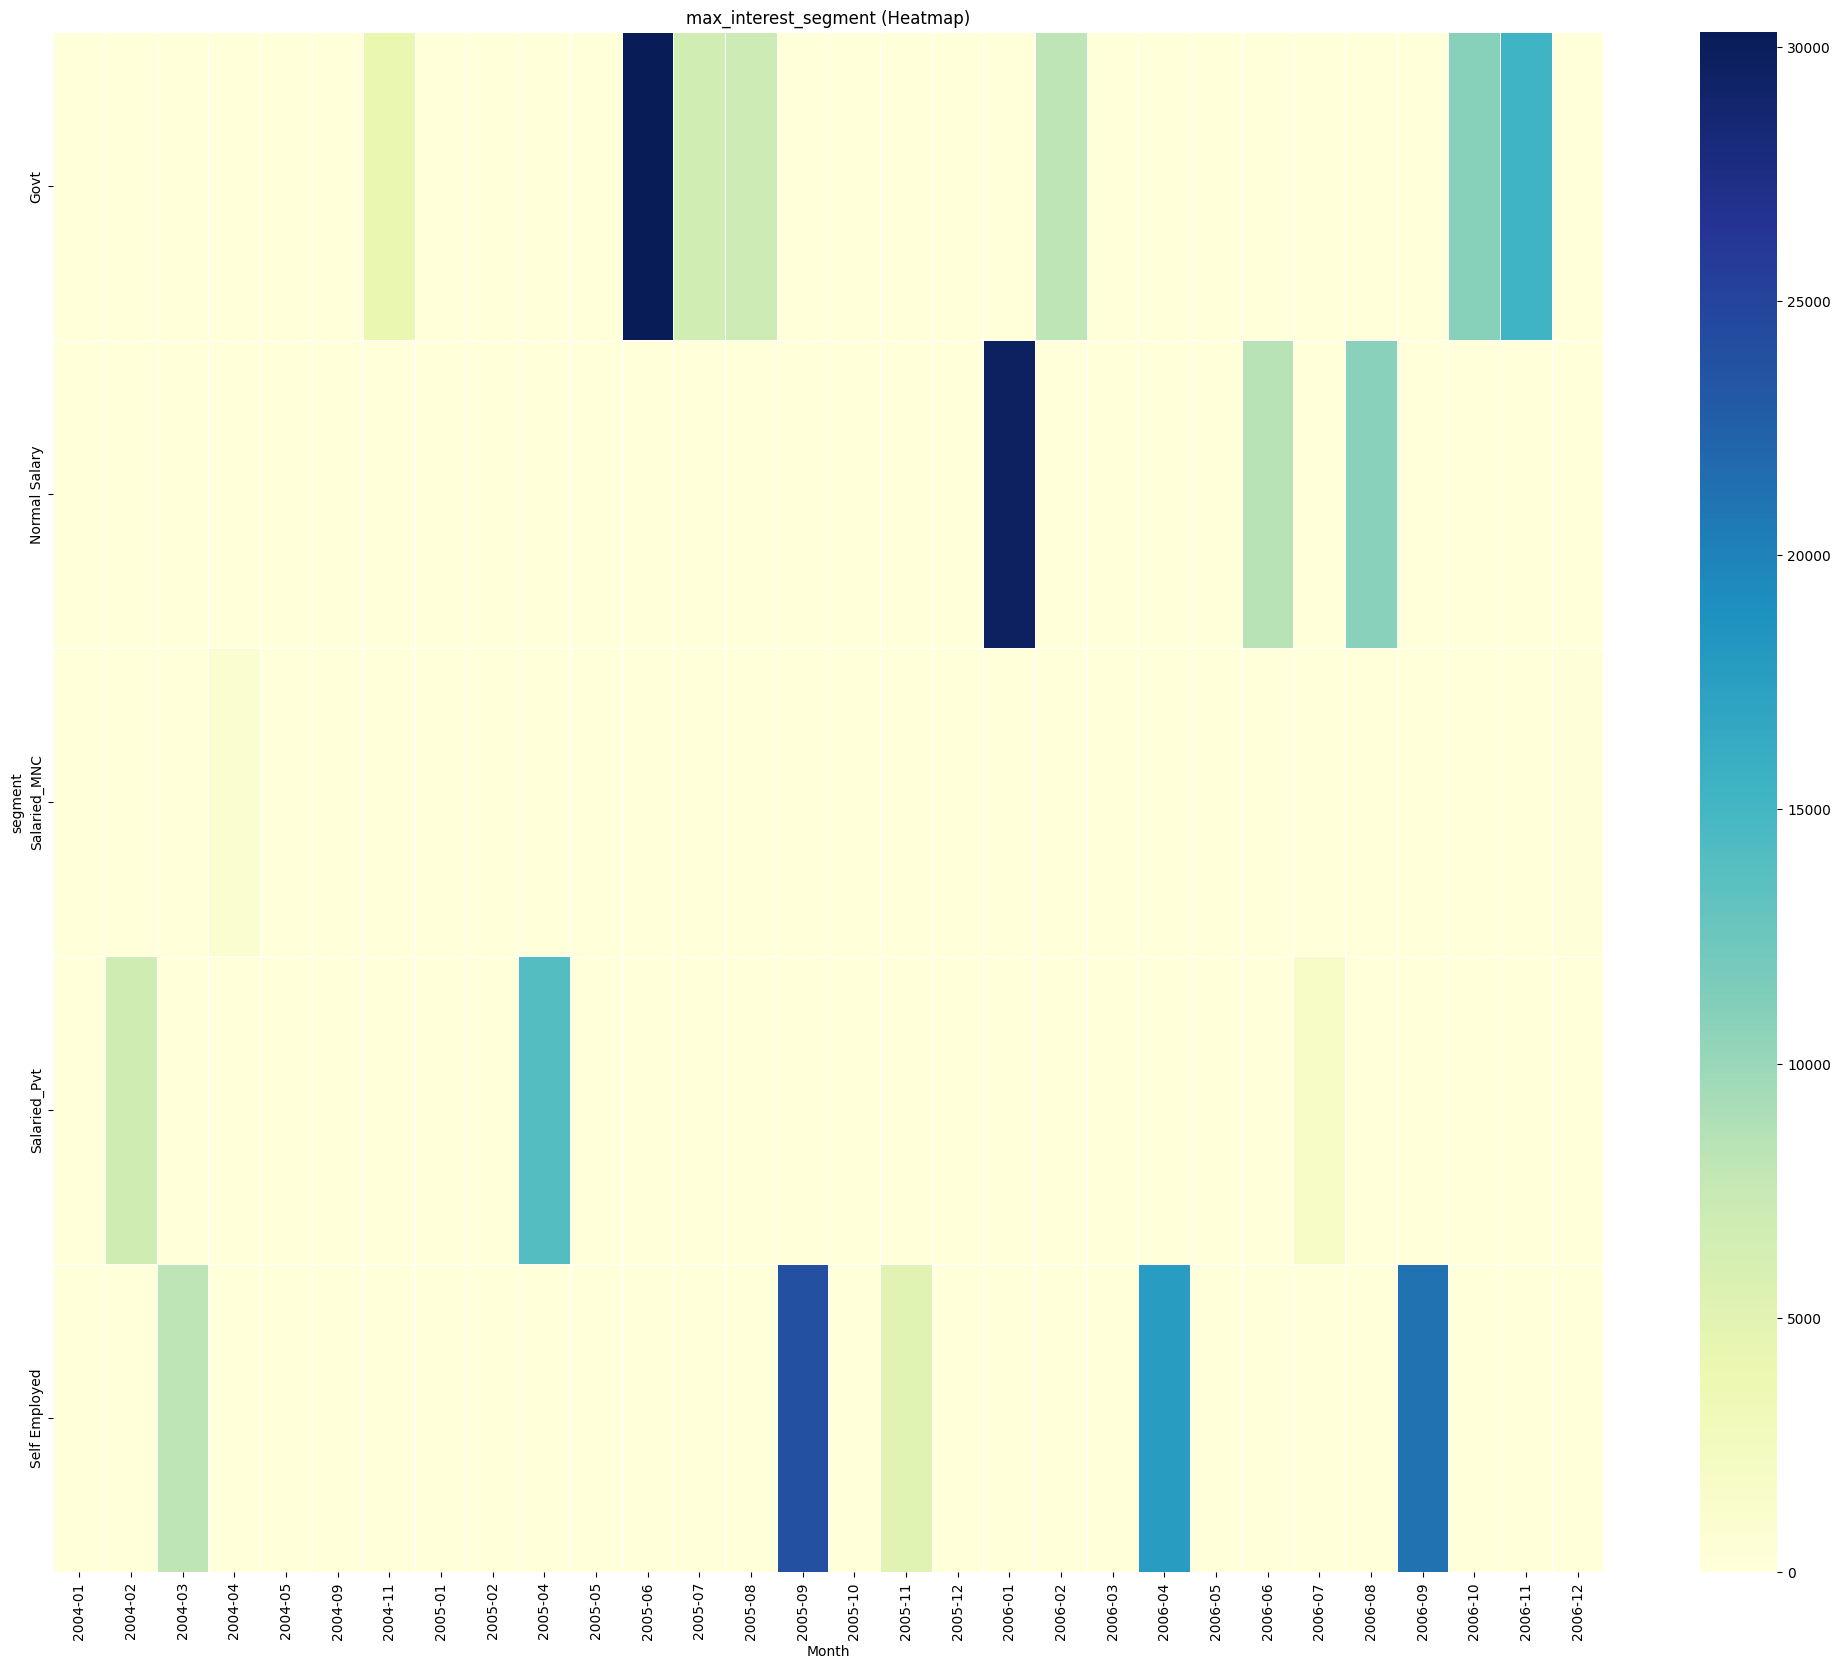

In [25]:
# Pivot the data for the heatmap
max_interest_segment_pivot = max_interest_segment.pivot(index='Segment', columns='Month_N', values='Interest').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(max_interest_segment_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('segment')
plt.title('max_interest_segment (Heatmap)')
plt.show()

**# Extracts unique values from the 'Type' column in the DataFrame df_spend_combined and prints them.**

---



In [27]:

# Extract unique values from the 'type' column
unique_types = df_spend_combined['Type'].unique()

# Print the unique values
print(unique_types)


['JEWELLERY' 'PETRO' 'CLOTHES' 'FOOD' 'CAMERA' 'SANDALS' 'CAR' 'BIKE'
 'AUTO' 'SHOPPING' 'AIR TICKET' 'BUS TICKET' 'TRAIN TICKET' 'RENTAL'
 'MOVIE TICKET']


**# The code categorizes spending types into predefined categories, calculates monthly spending totals by category, and identifies which category spends the most each month, offering insights into expenditure patterns across different categories.**

---



In [28]:
# Define the categories
categories = {
    'FOOD': 'Essentials',
    'PETRO': 'Essentials',
    'JEWELLERY': 'Luxury',
    'CAMERA': 'Luxury',
    'CLOTHES': 'Others',
    'SANDALS': 'Others',
    'CAR': 'Luxury',
    'BIKE': 'Luxury',
    'AUTO': 'Essentials',
    'SHOPPING': 'Others',
    'AIR TICKET': 'Travel',
    'BUS TICKET': 'Travel',
    'TRAIN TICKET': 'Travel',
    'RENTAL': 'Essentials',
    'MOVIE TICKET': 'Entertainment'
}

# Map the Type column to the categories
df_spend_combined['Category'] = df_spend_combined['Type'].map(categories)

# Group by Category and Month_N, and sum the Amount
category_monthly_spend = df_spend_combined.groupby(['Category', 'Month_N'])['Amount'].sum().reset_index()

# Find the category that spends the most money on a monthly basis
max_spending_category = category_monthly_spend.loc[category_monthly_spend.groupby('Month_N')['Amount'].idxmax()]

print(max_spending_category)


          Category  Month_N        Amount
46          Luxury  2004-01  1.355294e+07
95          Travel  2004-02  1.600009e+06
48          Luxury  2004-03  1.127206e+06
97          Travel  2004-04  1.543285e+06
21      Essentials  2004-05  2.165391e+06
51          Luxury  2004-09  8.893838e+05
100         Travel  2004-11  1.020503e+06
53          Luxury  2005-01  3.008769e+06
25      Essentials  2005-02  8.864704e+06
103         Travel  2005-04  3.370278e+06
104         Travel  2005-05  7.427074e+06
57          Luxury  2005-06  2.879739e+06
58          Luxury  2005-07  1.053788e+06
82          Others  2005-08  1.454066e+06
108         Travel  2005-09  1.085685e+06
109         Travel  2005-10  7.536062e+05
33      Essentials  2005-11  3.234528e+06
34      Essentials  2005-12  1.389693e+06
9    Entertainment  2006-01  9.224506e+05
113         Travel  2006-02  2.001631e+06
65          Luxury  2006-03  9.000522e+06
38      Essentials  2006-04  4.489921e+06
39      Essentials  2006-05  3.480

**HEATMAP FOR MAX_SPENDING_CATEGORY**

---



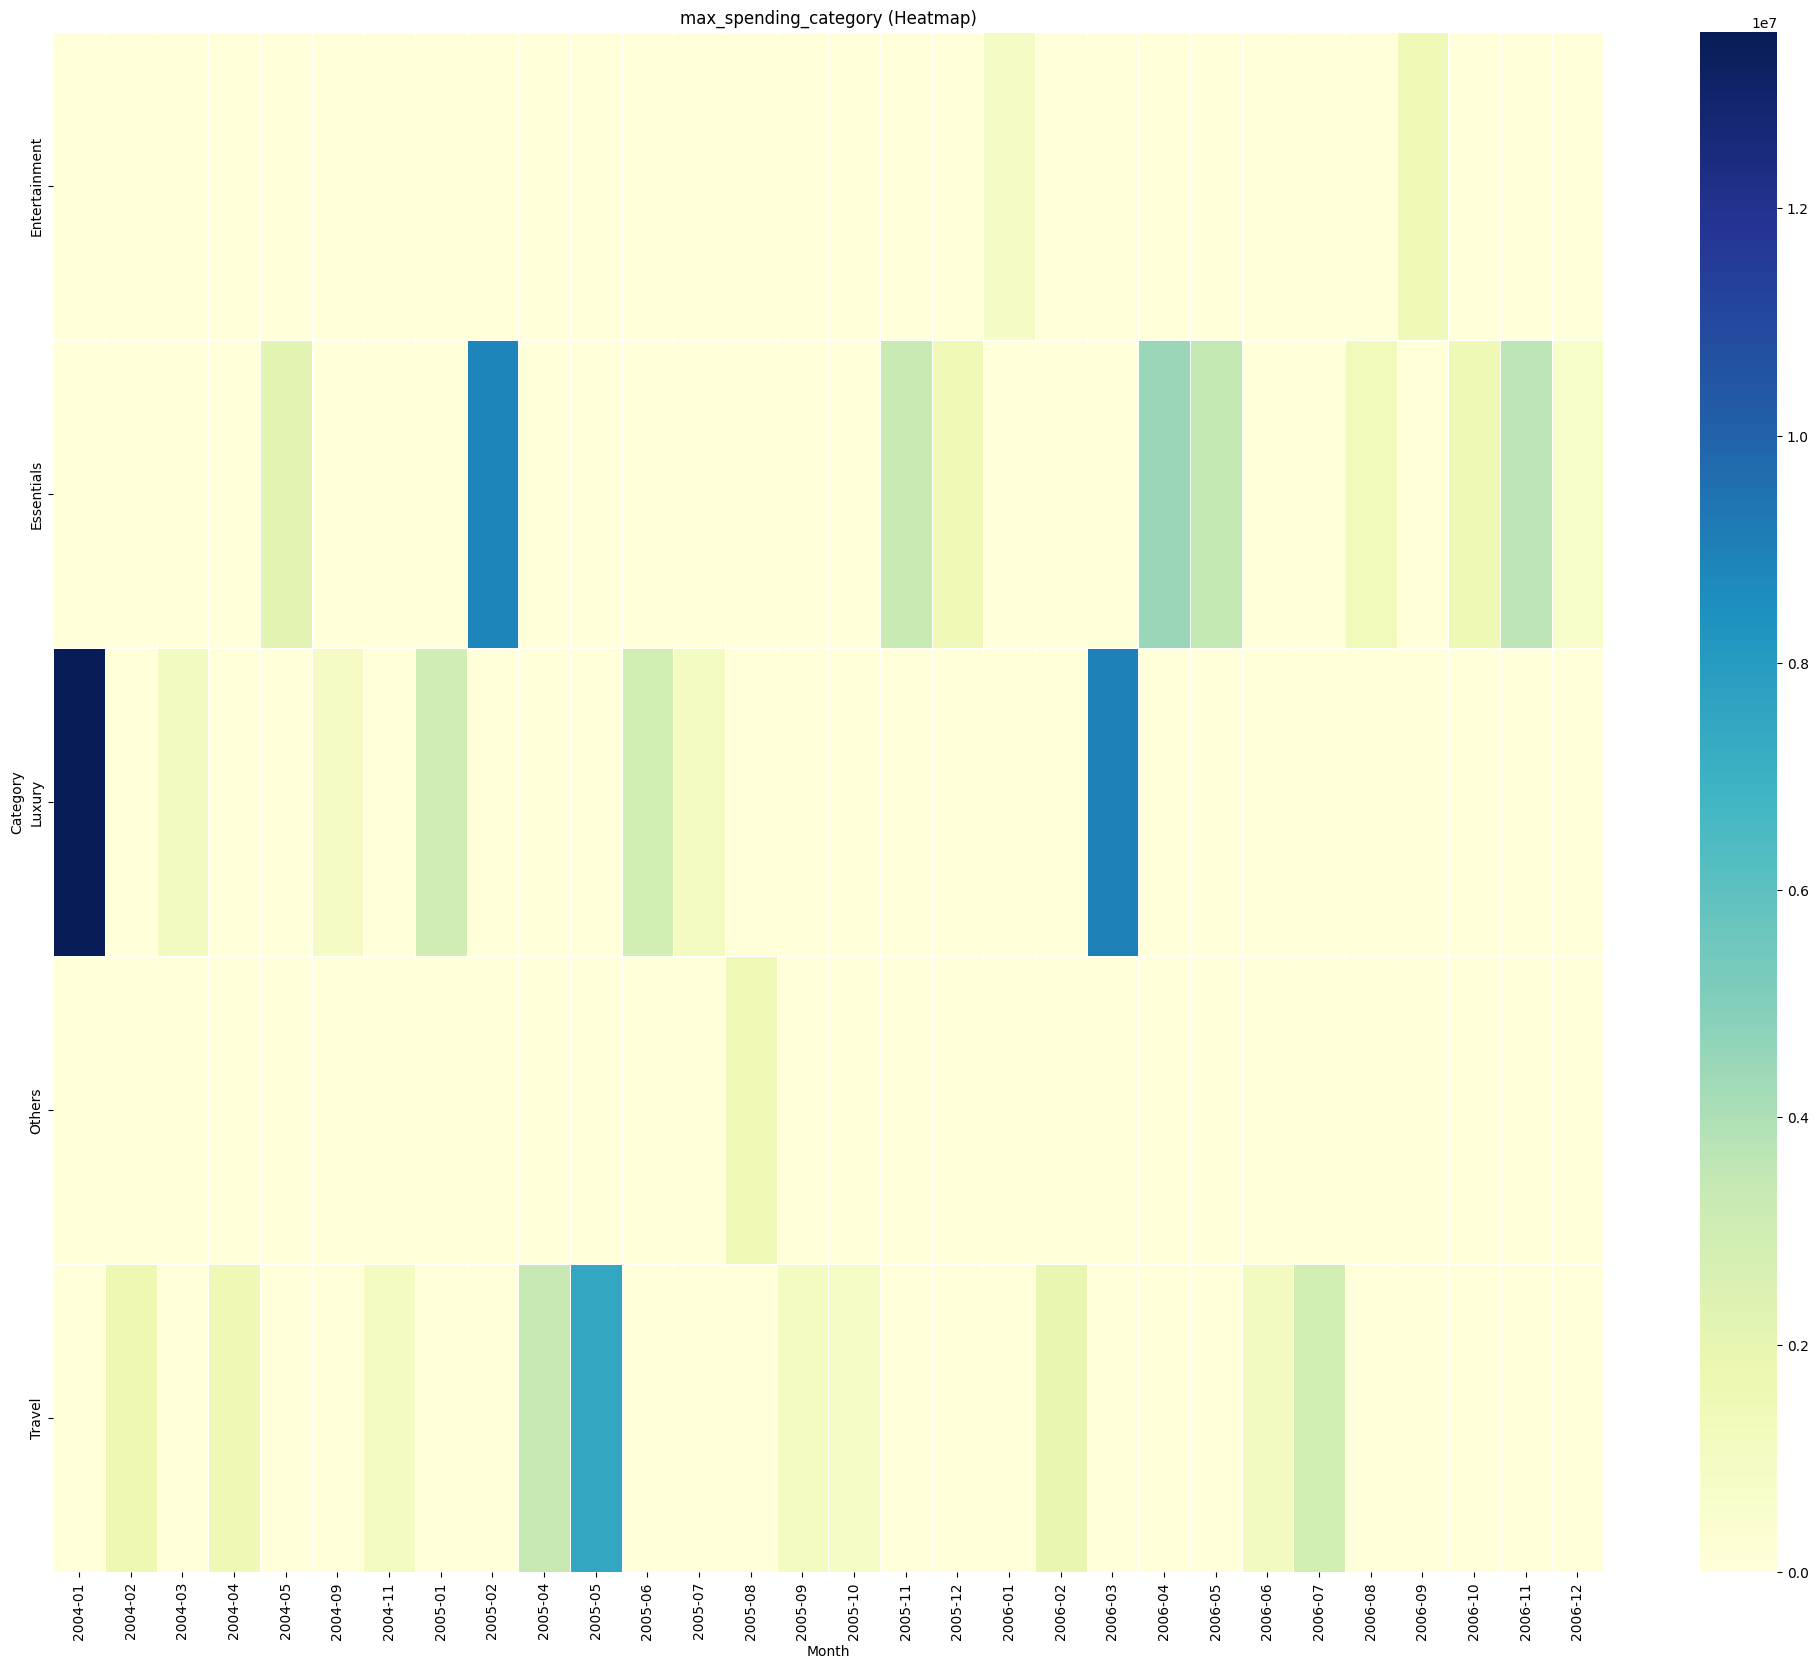

In [29]:
# Pivot the data for the heatmap
max_spending_category_pivot = max_spending_category.pivot(index='Category', columns='Month_N', values='Amount').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(max_spending_category_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Category')
plt.title('max_spending_category (Heatmap)')
plt.show()

**# The code aggregates spending and repayment amounts by customer and month, computes interest based on positive differences, and outputs a table showing monthly interest accrued by each customer, providing insights into financial dynamics at a customer level.**

---



In [30]:
# Group by Customer and Month_N for spending and repayment
spend_by_customer = df_spend_combined.groupby(['Customer', 'Month_N'])['Amount'].sum().reset_index()
repayment_by_customer = df_repayment_combined.groupby(['Customer', 'Month_N'])['Amount'].sum().reset_index()

# Merge the spend and repayment DataFrames on Customer and Month_N
combined_df = pd.merge(spend_by_customer, repayment_by_customer, on=['Customer', 'Month_N'], suffixes=('_spend', '_repayment'))

# Calculate the difference between spend and repayment
combined_df['Difference'] = combined_df['Amount_spend'] - combined_df['Amount_repayment']

# Impose an interest rate of 2.9% on the remaining amount if the difference is positive
combined_df['Interest'] = combined_df.apply(lambda x: x['Difference'] * 0.029 if x['Difference'] > 0 else 0, axis=1)

# Show the interest of each customer on monthly basis
interest_by_customer = combined_df[['Customer', 'Month_N', 'Interest']]
print(interest_by_customer)

    Customer  Month_N      Interest
0         A1  2004-01   4303.527824
1         A1  2004-02      0.000000
2         A1  2005-01  11507.832258
3         A1  2005-02   5927.177104
4         A1  2005-11   5186.084011
..       ...      ...           ...
498      A95  2004-01   7909.007232
499      A96  2004-01      0.000000
500      A97  2004-01      0.000000
501      A98  2004-01      0.000000
502      A99  2004-01      0.000000

[503 rows x 3 columns]


**HEATMAP FOR INTEREST_BY_CUSTOMER**

---



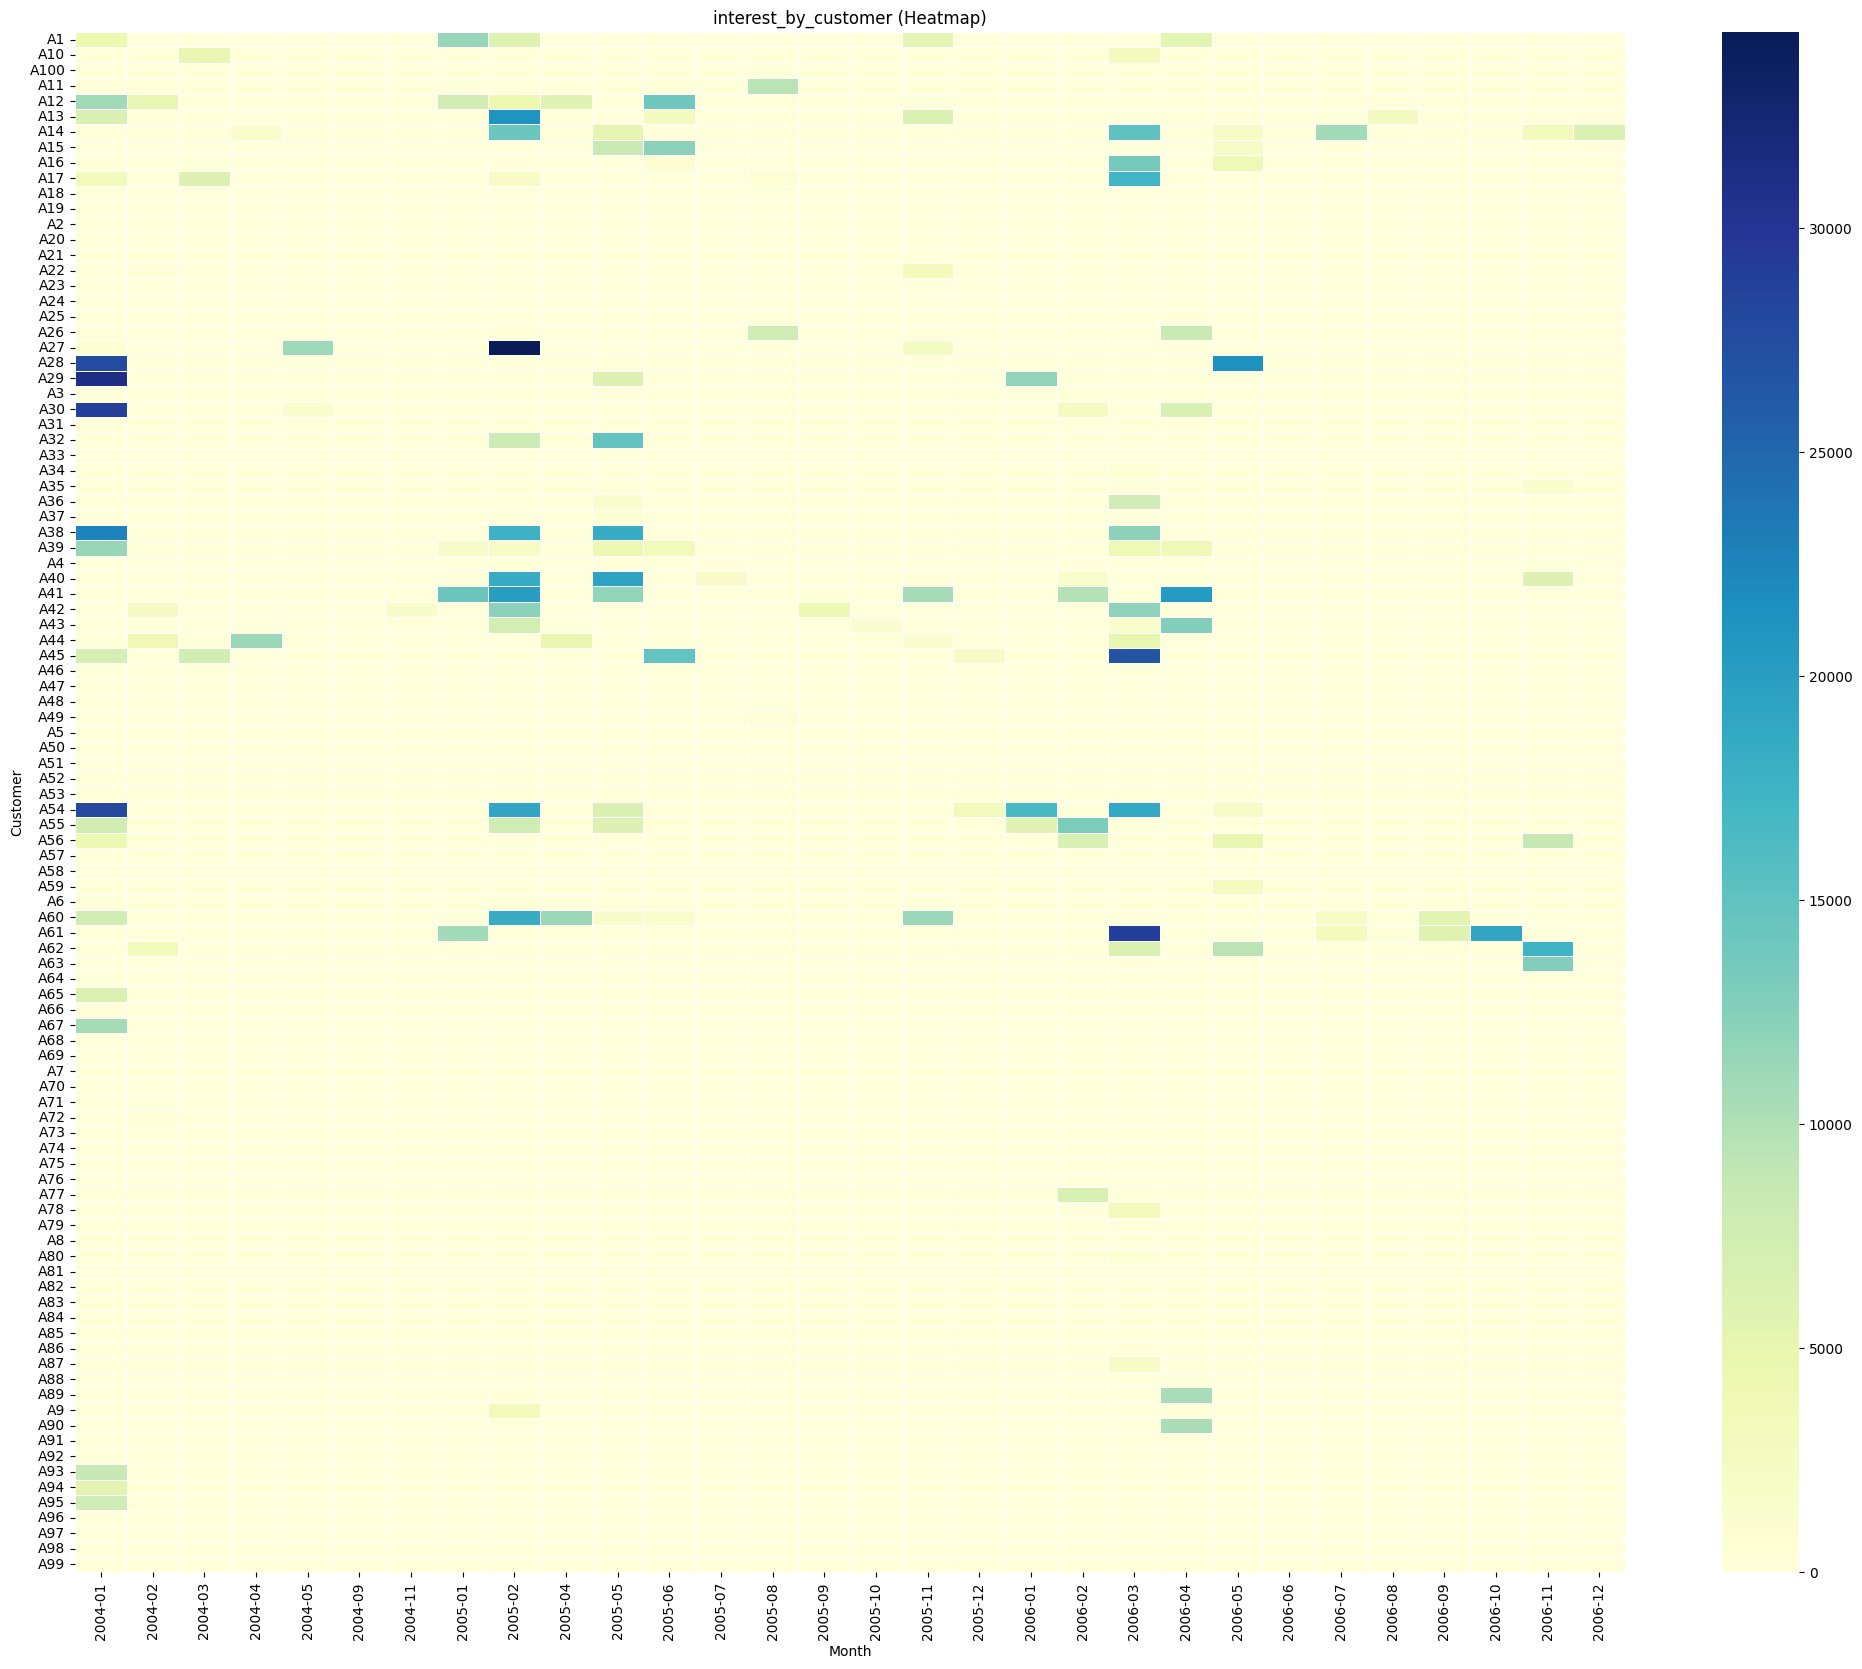

In [31]:
# Pivot the data for the heatmap
interest_by_customer_pivot = interest_by_customer.pivot(index='Customer', columns='Month_N', values='Interest').fillna(0)

# Create the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(interest_by_customer_pivot, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('interest_by_customer (Heatmap)')
plt.show()

**The code aggregates the interest earned from positive differences between spending and repayment for each month, providing a monthly total of bank profits derived from interest charges.**

---



In [32]:
# Calculate the profit of the bank, which is the total interest collected on a monthly basis
profit_by_month = combined_df.groupby('Month_N')['Interest'].sum().reset_index()

print(profit_by_month)

    Month_N       Interest
0   2004-01  240292.476632
1   2004-02   15104.788698
2   2004-03   18547.765786
3   2004-04   12551.752028
4   2004-05   12396.259914
5   2004-09       0.000000
6   2004-11    1822.994214
7   2005-01   45571.112025
8   2005-02  216599.869298
9   2005-04   21574.949111
10  2005-05  105637.448937
11  2005-06   49321.388570
12  2005-07    1678.972780
13  2005-08   18631.860337
14  2005-09    4291.554501
15  2005-10    1198.251230
16  2005-11   40741.959644
17  2005-12    5505.048552
18  2006-01   34093.948387
19  2006-02   40151.098839
20  2006-03  178374.942035
21  2006-04   77781.719895
22  2006-05   47803.155069
23  2006-06       0.000000
24  2006-07   15887.779537
25  2006-08    3157.186310
26  2006-09   11621.139083
27  2006-10   19183.384113
28  2006-11   49667.663974
29  2006-12    6416.781545


**BAR CHART FOR MONTHLY PROFIT**

---



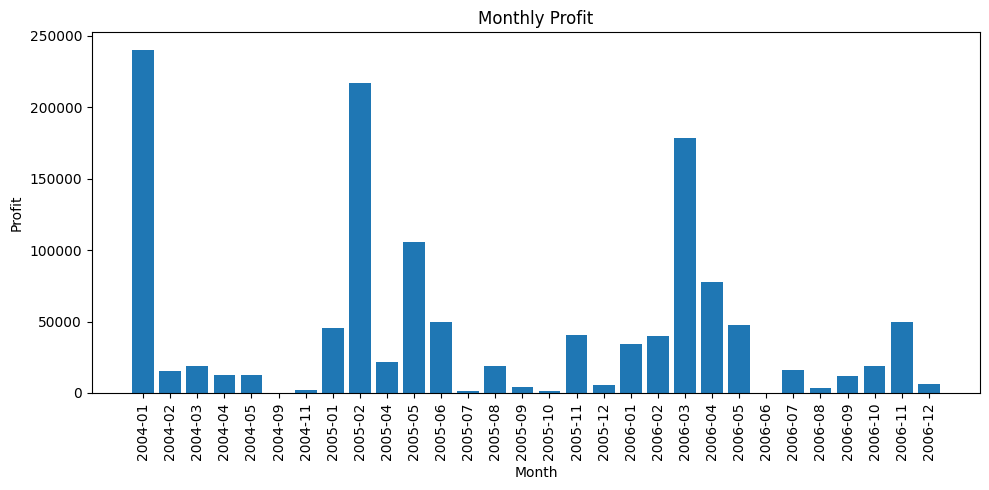

In [38]:
#Bar Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(profit_by_month['Month_N'].astype(str), profit_by_month['Interest'])  # Convert 'Month_N' to string for display
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit')
plt.xticks(rotation=90, va='top')  # Rotate x-axis labels vertically
plt.tight_layout()
plt.show()

In [40]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.4 MB/s eta 0:00:00


In [44]:
# Create an Excel writer object
excel_writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')

# Write each DataFrame to a different worksheet
monthly_spend.to_excel(excel_writer, sheet_name='monthly_spend', index=False)
monthly_repayment.to_excel(excel_writer, sheet_name='monthly_repayment', index=False)
top_10_repaying_customers_per_month.to_excel(excel_writer, sheet_name='top_10_repaying_customers', index=False)
top_segment_spend_per_month.to_excel(excel_writer, sheet_name='top_segment_spend_per_month', index=False)
highest_spending_by_month.to_excel(excel_writer, sheet_name='highest_spending_by_month', index=False)
max_interest_segment.to_excel(excel_writer, sheet_name='max_interest_segment', index=False)
max_spending_category.to_excel(excel_writer, sheet_name='max_spending_category', index=False)
interest_by_customer.to_excel(excel_writer, sheet_name='interest_by_customer', index=False)
profit_by_month.to_excel(excel_writer, sheet_name='profit_by_month', index=False)

# Save the Excel file
excel_writer.close()

print("Excel file 'bank_profit.xlsx' has been created with each output in a separate worksheet.")

Excel file 'bank_profit.xlsx' has been created with each output in a separate worksheet.
